# Skyrme equation of state example for O$_2$sclpy

See the O$_2$sclpy documentation at https://neutronstars.utk.edu/code/o2sclpy for more information.

In [1]:
import o2sclpy
import matplotlib.pyplot as plot
import ctypes

Link the O$_2$scl library:

In [2]:
link=o2sclpy.linker()
link.link_o2scl_o2graph()

Get the value of $\hbar c$ from an O$_2$scl find_constants object:

In [3]:
fc=o2sclpy.find_constants(link)
hc=fc.find_unique('hbarc','MeV*fm')
print('hbarc = %7.6e' % (hc))

hbarc = 1.973270e+02


Get a copy (a pointer to) the O$_2$scl unit conversion object:

In [4]:
cu=link.o2scl_settings.get_convert_units()

Create neutron and proton objects and set their spin degeneracy and
masses. The O$_2$scl EOS classes expect these masses to be in units of inverse
femtometers.

In [5]:
neut=o2sclpy.fermion(link)
neut.g=2.0
neut.m=cu.convert('g','1/fm',fc.find_unique('massneutron','g'))

In [6]:
prot=o2sclpy.fermion(link)
prot.g=2.0
prot.m=cu.convert('g','1/fm',fc.find_unique('massproton','g'))

Create the Skyrme EOS object and load the NRAPR parameterization:

In [7]:
sk=o2sclpy.eos_had_skyrme(link)
o2sclpy.skyrme_load(link,sk,'NRAPR',False,0)

Compute nuclear saturation and output the saturation density
and binding energy:

In [8]:
sk.saturation()
print('NRAPR: n0=%7.6e 1/fm^3, E/A=%7.6e MeV' % (sk.n0,sk.eoa*hc))
print('')

NRAPR: n0=1.605785e-01 1/fm^3, E/A=-1.585619e+01 MeV



Create the nstar_cold object for automatically computing the
beta-equilibrium EOS and solving the TOV equations:

In [9]:
nc=o2sclpy.nstar_cold(link)

Let the nstar_cold object know we want to use the Skyrme NRAPR EOS:

In [10]:
nc.set_eos(sk)

Compute the EOS

In [11]:
ret1=nc.calc_eos(0.01)

Summarize the columns in the EOS table and their associated units. The strings returned by the C++ wrappers are bytes objects, so we need to convert them to strings to print them out.

In [12]:
eos_table=nc.get_eos_results()
print('EOS table:')
for i in range(0,eos_table.get_ncolumns()):
    col=eos_table.get_column_name(i)
    unit=eos_table.get_unit(col)
    print('Column',i,str(col,'UTF-8'),str(unit,'UTF-8'))
print('')

EOS table:
Column 0 ed 1/fm^4
Column 1 pr 1/fm^4
Column 2 nb 1/fm^3
Column 3 mun 1/fm
Column 4 mup 1/fm
Column 5 mue 1/fm
Column 6 nn 1/fm^3
Column 7 np 1/fm^3
Column 8 ne 1/fm^3
Column 9 kfn 1/fm
Column 10 kfp 1/fm
Column 11 kfe 1/fm
Column 12 cs2 
Column 13 logp 
Column 14 loge 
Column 15 s 1/fm
Column 16 urca 1/fm^4
Column 17 ad_index 



Get the columns of the table as numpy arrays, and then plot the EOS:

<class 'numpy.ndarray'>


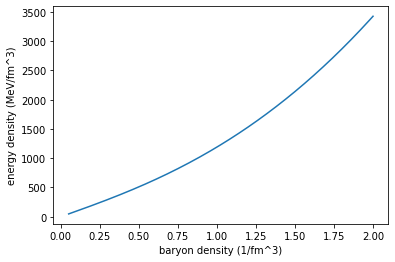

In [13]:
nb=eos_table['nb']
print(type(nb))
ed=eos_table['ed']
edhc=[ed[i]*hc for i in range(0,eos_table.get_nlines())]
plot.plot(nb,edhc)
plot.xlabel('baryon density (1/fm^3)')
plot.ylabel('energy density (MeV/fm^3)')
plot.show()

Compute the M-R curve using the TOV equations. TOV solver automatically outputs some information to std::cout, and we use the cap_cout class to ensure that output goes here
instead of the jupyter console.

In [14]:
cc=o2sclpy.cap_cout()
cc.open()
nc.err_nonconv=False
ret2=nc.calc_nstar()
cc.close()

Contents of std::cout:
Mass versus radius mode.
Central P: 7.0000e-07 (Msun/km^3), M: 1.1194e-01 (Msun), R: 4.9240e+01 (km)
Central P: 7.7000e-07 (Msun/km^3), M: 1.1726e-01 (Msun), R: 4.1158e+01 (km)
Central P: 8.4700e-07 (Msun/km^3), M: 1.2311e-01 (Msun), R: 3.5499e+01 (km)
Central P: 9.3170e-07 (Msun/km^3), M: 1.2954e-01 (Msun), R: 3.1326e+01 (km)
Central P: 1.0249e-06 (Msun/km^3), M: 1.3650e-01 (Msun), R: 2.8161e+01 (km)
Central P: 1.1274e-06 (Msun/km^3), M: 1.4405e-01 (Msun), R: 2.5677e+01 (km)
Central P: 1.2401e-06 (Msun/km^3), M: 1.5217e-01 (Msun), R: 2.3694e+01 (km)
Central P: 1.3641e-06 (Msun/km^3), M: 1.6091e-01 (Msun), R: 2.2080e+01 (km)
Central P: 1.5005e-06 (Msun/km^3), M: 1.7029e-01 (Msun), R: 2.0747e+01 (km)
Central P: 1.6506e-06 (Msun/km^3), M: 1.8033e-01 (Msun), R: 1.9634e+01 (km)
Central P: 1.8156e-06 (Msun/km^3), M: 1.9107e-01 (Msun), R: 1.8693e+01 (km)
Central P: 1.9972e-06 (Msun/km^3), M: 2.0254e-01 (Msun), R: 1.7893e+01 (km)
Central P: 2.1969e-06 (Msun/km^3), M: 2.

Get the table for the TOV results

In [15]:
tov_table=nc.get_tov_results()

Summarize the columns in the TOV table and their associated units.

In [16]:
print('TOV table:')
for i in range(0,tov_table.get_ncolumns()):
    col=tov_table.get_column_name(i)
    unit=tov_table.get_unit(col)
    print('Column',i,str(col,'UTF-8'),str(unit,'UTF-8'))
print('')

TOV table:
Column 0 gm Msun
Column 1 r km
Column 2 bm Msun
Column 3 pr 1/fm^4
Column 4 ed 1/fm^4
Column 5 nb 1/fm^3
Column 6 sg 1/km
Column 7 rs 
Column 8 dmdr Msun/km
Column 9 dlogpdr 1/km
Column 10 dbmdr Msun/km



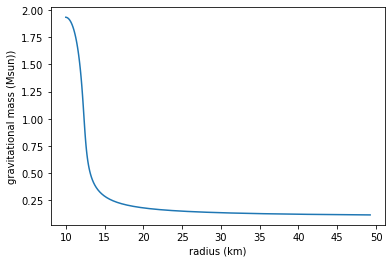

In [17]:
plot.plot(tov_table['r'],tov_table['gm'])
plot.xlabel('radius (km)')
plot.ylabel('gravitational mass (Msun))')
plot.show()

This line computes the profile of a 1.4 solar mass 
neutron star. If you look at the console output you will
notice that the maximum mass is computed first. This
helps ensure the class doesn't give the profile of an
unstable configuration.

In [18]:
ret2=nc.fixed(1.4)

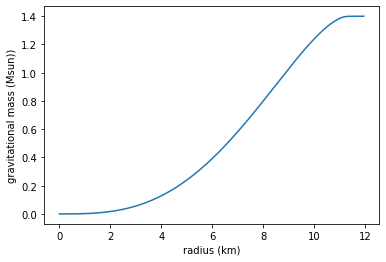

In [19]:
plot.plot(tov_table['r'],tov_table['gm'])
plot.xlabel('radius (km)')
plot.ylabel('gravitational mass (Msun))')
plot.show()

Create a O$_2$scl tov_love object to compute the tidal
deformability:

In [20]:
tl=o2sclpy.tov_love(link)
tl.show_ode=1

In [21]:
tov_table.deriv_col('ed','pr','cs2')

Provide the TOV table to the tov_love object:

In [22]:
tl.set_tab(tov_table)

In [23]:
yR=ctypes.c_double(0.0)
beta=ctypes.c_double(0.0)
k2=ctypes.c_double(0.0)
lambda_km5=ctypes.c_double(0.0)
lambda_cgs=ctypes.c_double(0.0)
tl.calc_y(ctypes.byref(yR),ctypes.byref(beta),ctypes.byref(k2),
          ctypes.byref(lambda_km5),ctypes.byref(lambda_cgs),False)

TypeError: calc_y() takes 2 positional arguments but 7 were given